In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from pyndamics3 import Simulation
from pyndamics3.fit import fit, Parameter

pyndamics3  version  0.0.29


In [4]:
t_data=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h_data=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

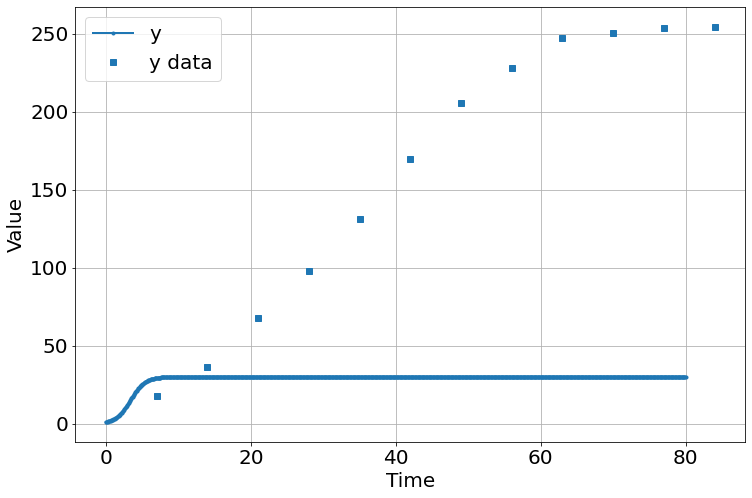

<Figure size 864x576 with 0 Axes>

In [24]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1,plot=True)
sim.params(a=1,k=30)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.run(80)

In [25]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0,max=20),
           Parameter("k",value=30,min=0),
           )
results

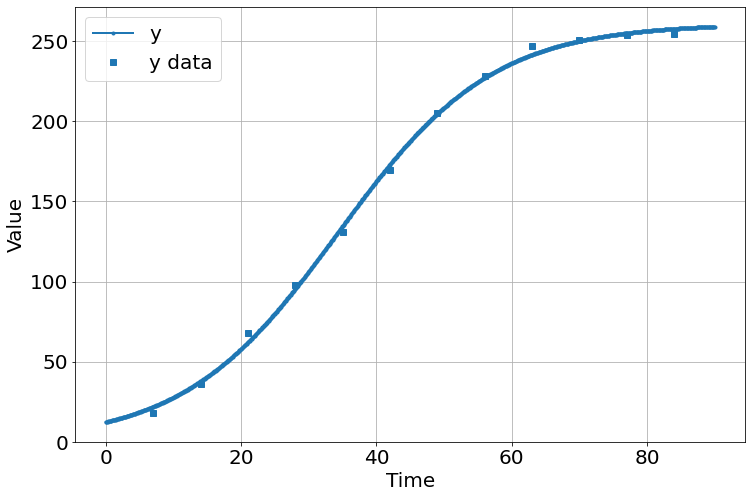

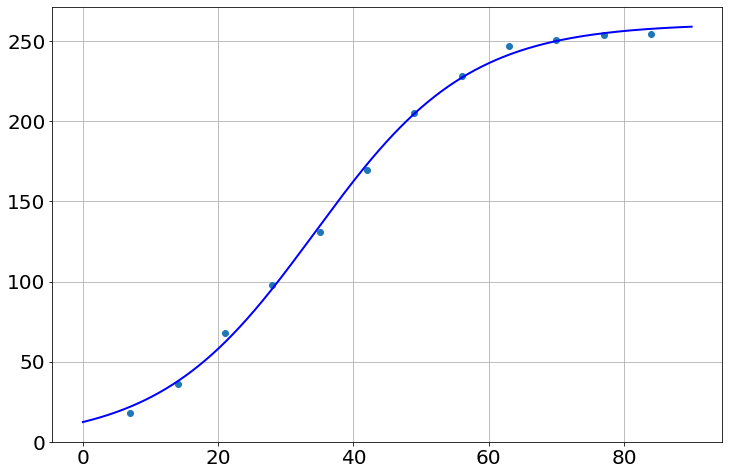

In [31]:
sim.run(90)

best_t=sim.t
best_y=sim.y

plot(t_data,h_data,'o')
plot(best_t,best_y,'b-')


In [27]:
results.params

name,value,standard error,relative error,initial value,min,max,vary
a,0.08770675,0.00300790,(3.43%),1,0.00000000,10.0000000,True
initial_y,12.3093196,1.13272642,(9.20%),1,0.00000000,20.0000000,True
k,261.040115,2.63566594,(1.01%),30,0.00000000,inf,True


In [65]:
def run_sim_monte_carlo(t_max,sim,results,σ=1,color='b',N=300):
    
    D={}
    for key in results.params:
        if key.startswith('initial_'):
            name=key.split('initial_')[1]
            _c=sim.get_component(name)
            _c.initial_value=results.params[key].value
        else:
            sim.params(**{key:results.params[key].value})

    sim.run(t_max)
    
    best_t=sim.t
    best_y=sim.y


    plot(best_t,best_y,color+'-')

    for i in range(N):
        D={}
        for key in results.params:
            if key.startswith('initial_'):
                name=key.split('initial_')[1]
                _c=sim.get_component(name)
                _c.initial_value=results.params[key].value+randn()*results.params[key].stderr*σ
            else:
                sim.params(**{key:results.params[key].value+randn()*results.params[key].stderr*σ})

        sim.run(90)
        plot(sim.t,sim.y,color+'-',alpha=0.01)



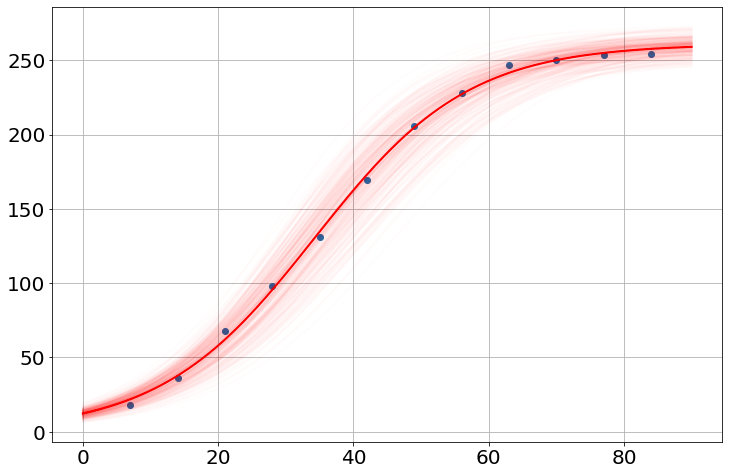

In [66]:
plot(t_data,h_data,'o')
run_sim_monte_carlo(90,sim,results,σ=2,color='r')
